# Realtime Text Detection in Images using Tesseract | OpenCV | Python | Tutorial for beginners
https://www.youtube.com/watch?v=Y7XBsFzByTQ

- pip install pytesseract
- pip install opencv-python

다운로드
- https://github.com/UB-Mannheim/tesseract/wiki

In [3]:
import pytesseract

import cv2

# 실행파일 위치지정
# pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [7]:
import matplotlib.pyplot as plt

In [5]:
# for cinfiguration
img = cv2.imread('image.png')

In [6]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

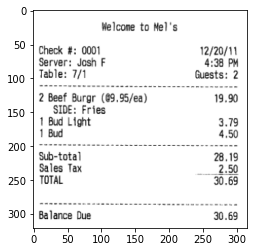

In [9]:
plt.imshow(img)

In [11]:
img2char = pytesseract.image_to_string(img)
print(img2char)

Welcome to Mel's

12/20/11
4:38 PM

    
  

2 Beef Burgr (€9,95/ea)
SIDE: Fries

1 Bud Light 3.79

1 Bud

Sub-total
Sales Tax 2.50
TOTAL 30.69

 



In [12]:
imgbox = pytesseract.image_to_boxes(img)
print(imgbox)

W 102 290 108 304 0
e 102 290 115 303 0
l 117 290 120 304 0
c 123 290 129 300 0
o 130 290 138 304 0
m 130 290 150 300 0
e 144 290 150 304 0
t 158 290 163 302 0
o 164 290 171 300 0
M 179 290 185 303 0
e 178 290 192 303 0
l 194 290 197 303 0
' 202 299 203 303 0
s 206 290 212 300 0
1 246 255 250 267 0
2 252 255 259 267 0
/ 260 253 265 267 0
2 265 253 273 268 0
0 266 255 280 267 0
/ 281 253 286 268 0
1 289 255 292 267 0
1 296 255 300 267 0
4 253 237 259 250 0
: 262 237 264 246 0
3 267 237 273 250 0
8 274 237 280 250 0
P 288 237 294 250 0
M 295 237 302 250 0
~ 5 215 106 273 0
~ 167 223 303 232 0
~ 167 185 303 223 0
~ 65 135 303 145 0
~ 65 98 303 135 0
2 9 186 16 199 0
B 23 186 29 199 0
e 29 186 37 199 0
e 30 186 43 196 0
f 44 186 50 199 0
B 58 186 64 198 0
u 65 186 71 195 0
r 73 186 78 195 0
g 79 184 85 195 0
r 87 186 92 195 0
( 101 184 105 198 0
€ 106 184 113 198 0
9 107 185 120 198 0
, 123 185 125 189 0
9 126 184 134 198 0
5 128 185 141 198 0
/ 142 184 147 198 0
e 146 184 154 198 0
a 148 

In [13]:
imgH, imgW, _ = img.shape

In [14]:
img.shape

(321, 315, 3)

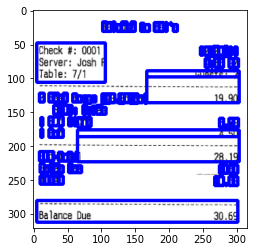

In [16]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    cv2.rectangle(img, (x, imgH-y), (w, imgH-h), (0,0,255), 1)
    
plt.imshow(img)

In [ ]:
# video demo

In [17]:
import cv2
import numpy as np
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

In [22]:
cap = cv2.VideoCapture("test.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    
if not cap.isOpened():
    raise IOError("Cann not open webcam...")
    
cntr = 0

while True:
    ret, frame = cap.read()
    cntr = cntr + 1;
    if ((cntr%20)==0):
        
        imgH, imhW, _ = frame.shape
        x1, y1, w1, h1 = 0, 0, imgH, imhW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH-y), (w, imgH-h), (0,0,255), 1)
        
        cv2.putText(frame, imgchar, (x1 + int(w1/50), y1 + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),1)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.imshow('Text detection...', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

# webcam

In [24]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    
if not cap.isOpened():
    raise IOError("Cann not open webcam...")
    
cntr = 0

while True:
    ret, frame = cap.read()
    cntr = cntr + 1;
    if ((cntr%20)==0):
        
        imgH, imhW, _ = frame.shape
        x1, y1, w1, h1 = 0, 0, imgH, imhW
        imgchar = pytesseract.image_to_string(frame, lang='kor')
        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH-y), (w, imgH-h), (0,0,255), 1)
        
        cv2.putText(frame, imgchar, (x1 + int(w1/50), y1 + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),1)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.imshow('Text detection...', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()